## Predicting E-signing a Loan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('financial_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17908 entries, 0 to 17907
Data columns (total 21 columns):
entry_id                17908 non-null int64
age                     17908 non-null int64
pay_schedule            17908 non-null object
home_owner              17908 non-null int64
income                  17908 non-null int64
months_employed         17908 non-null int64
years_employed          17908 non-null int64
current_address_year    17908 non-null int64
personal_account_m      17908 non-null int64
personal_account_y      17908 non-null int64
has_debt                17908 non-null int64
amount_requested        17908 non-null int64
risk_score              17908 non-null int64
risk_score_2            17908 non-null float64
risk_score_3            17908 non-null float64
risk_score_4            17908 non-null float64
risk_score_5            17908 non-null float64
ext_quality_score       17908 non-null float64
ext_quality_score_2     17908 non-null float64
inquiries_last_month   

In [3]:
# Check for null values
df.isnull().values.sum()

0

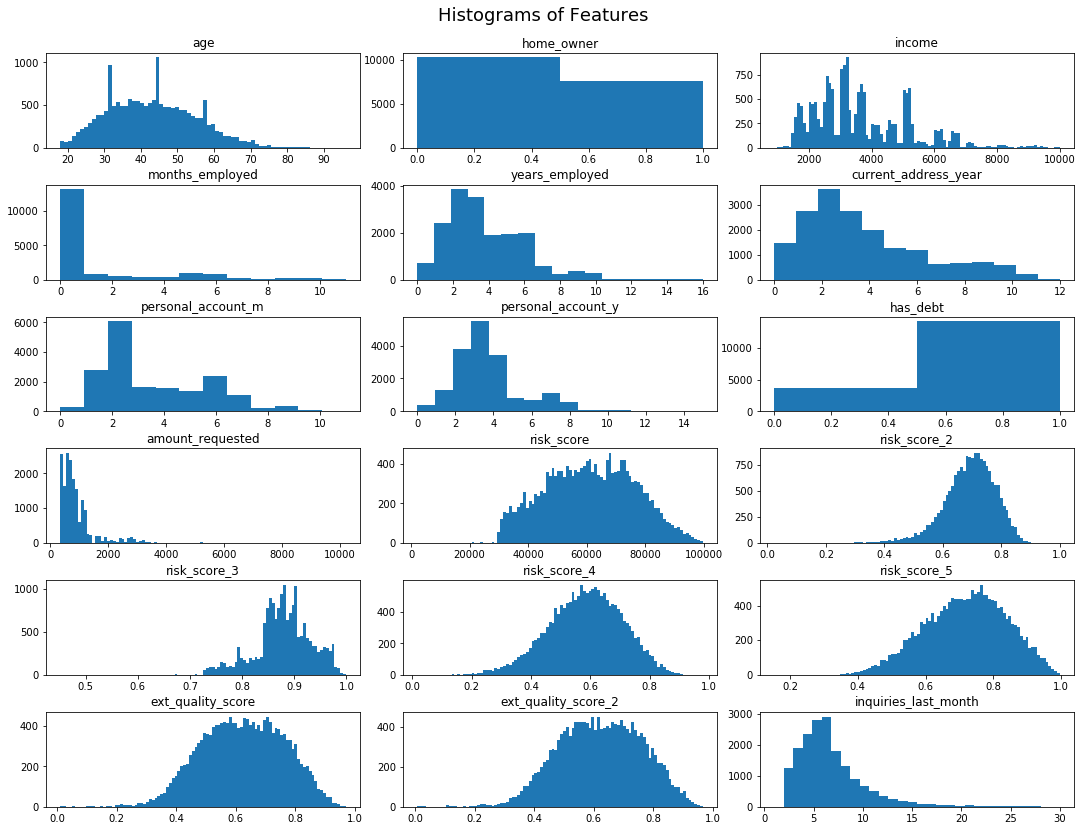

In [4]:
# Show histograms
plot_features = df.drop(['entry_id', 'pay_schedule', 'e_signed'], axis=1)
fig = plt.figure(figsize=(15, 12))
for i in range(plot_features.shape[1]):
    plt.subplot(6, 3, i + 1)
    ax = plt.gca()
    ax.set_title(plot_features.columns.values[i])
    vals = np.size(plot_features.iloc[:, i].unique())
    if vals >= 100:
        vals = 100
        
    plt.hist(plot_features.iloc[:, i], bins=vals)

plt.suptitle('Histograms of Features', fontsize=18)
plt.tight_layout(pad=0.4, rect=[0, 0.03, 1, 0.95])
plt.show()

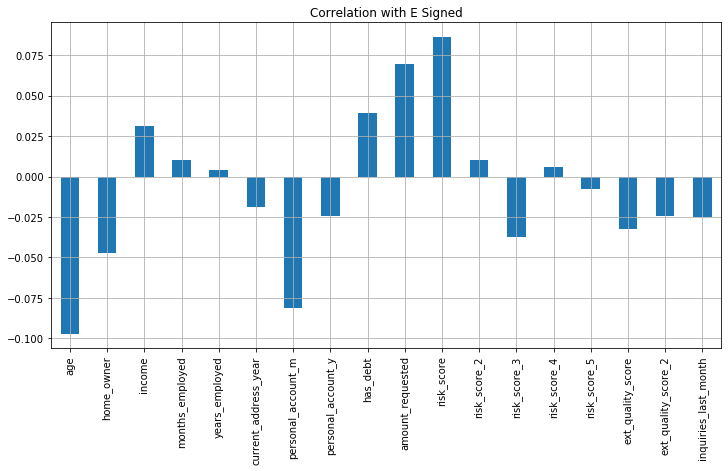

In [5]:
# Correlation with target
plot_features.corrwith(df.e_signed).plot.bar(figsize=(12,6), title='Correlation with E Signed', grid=True)

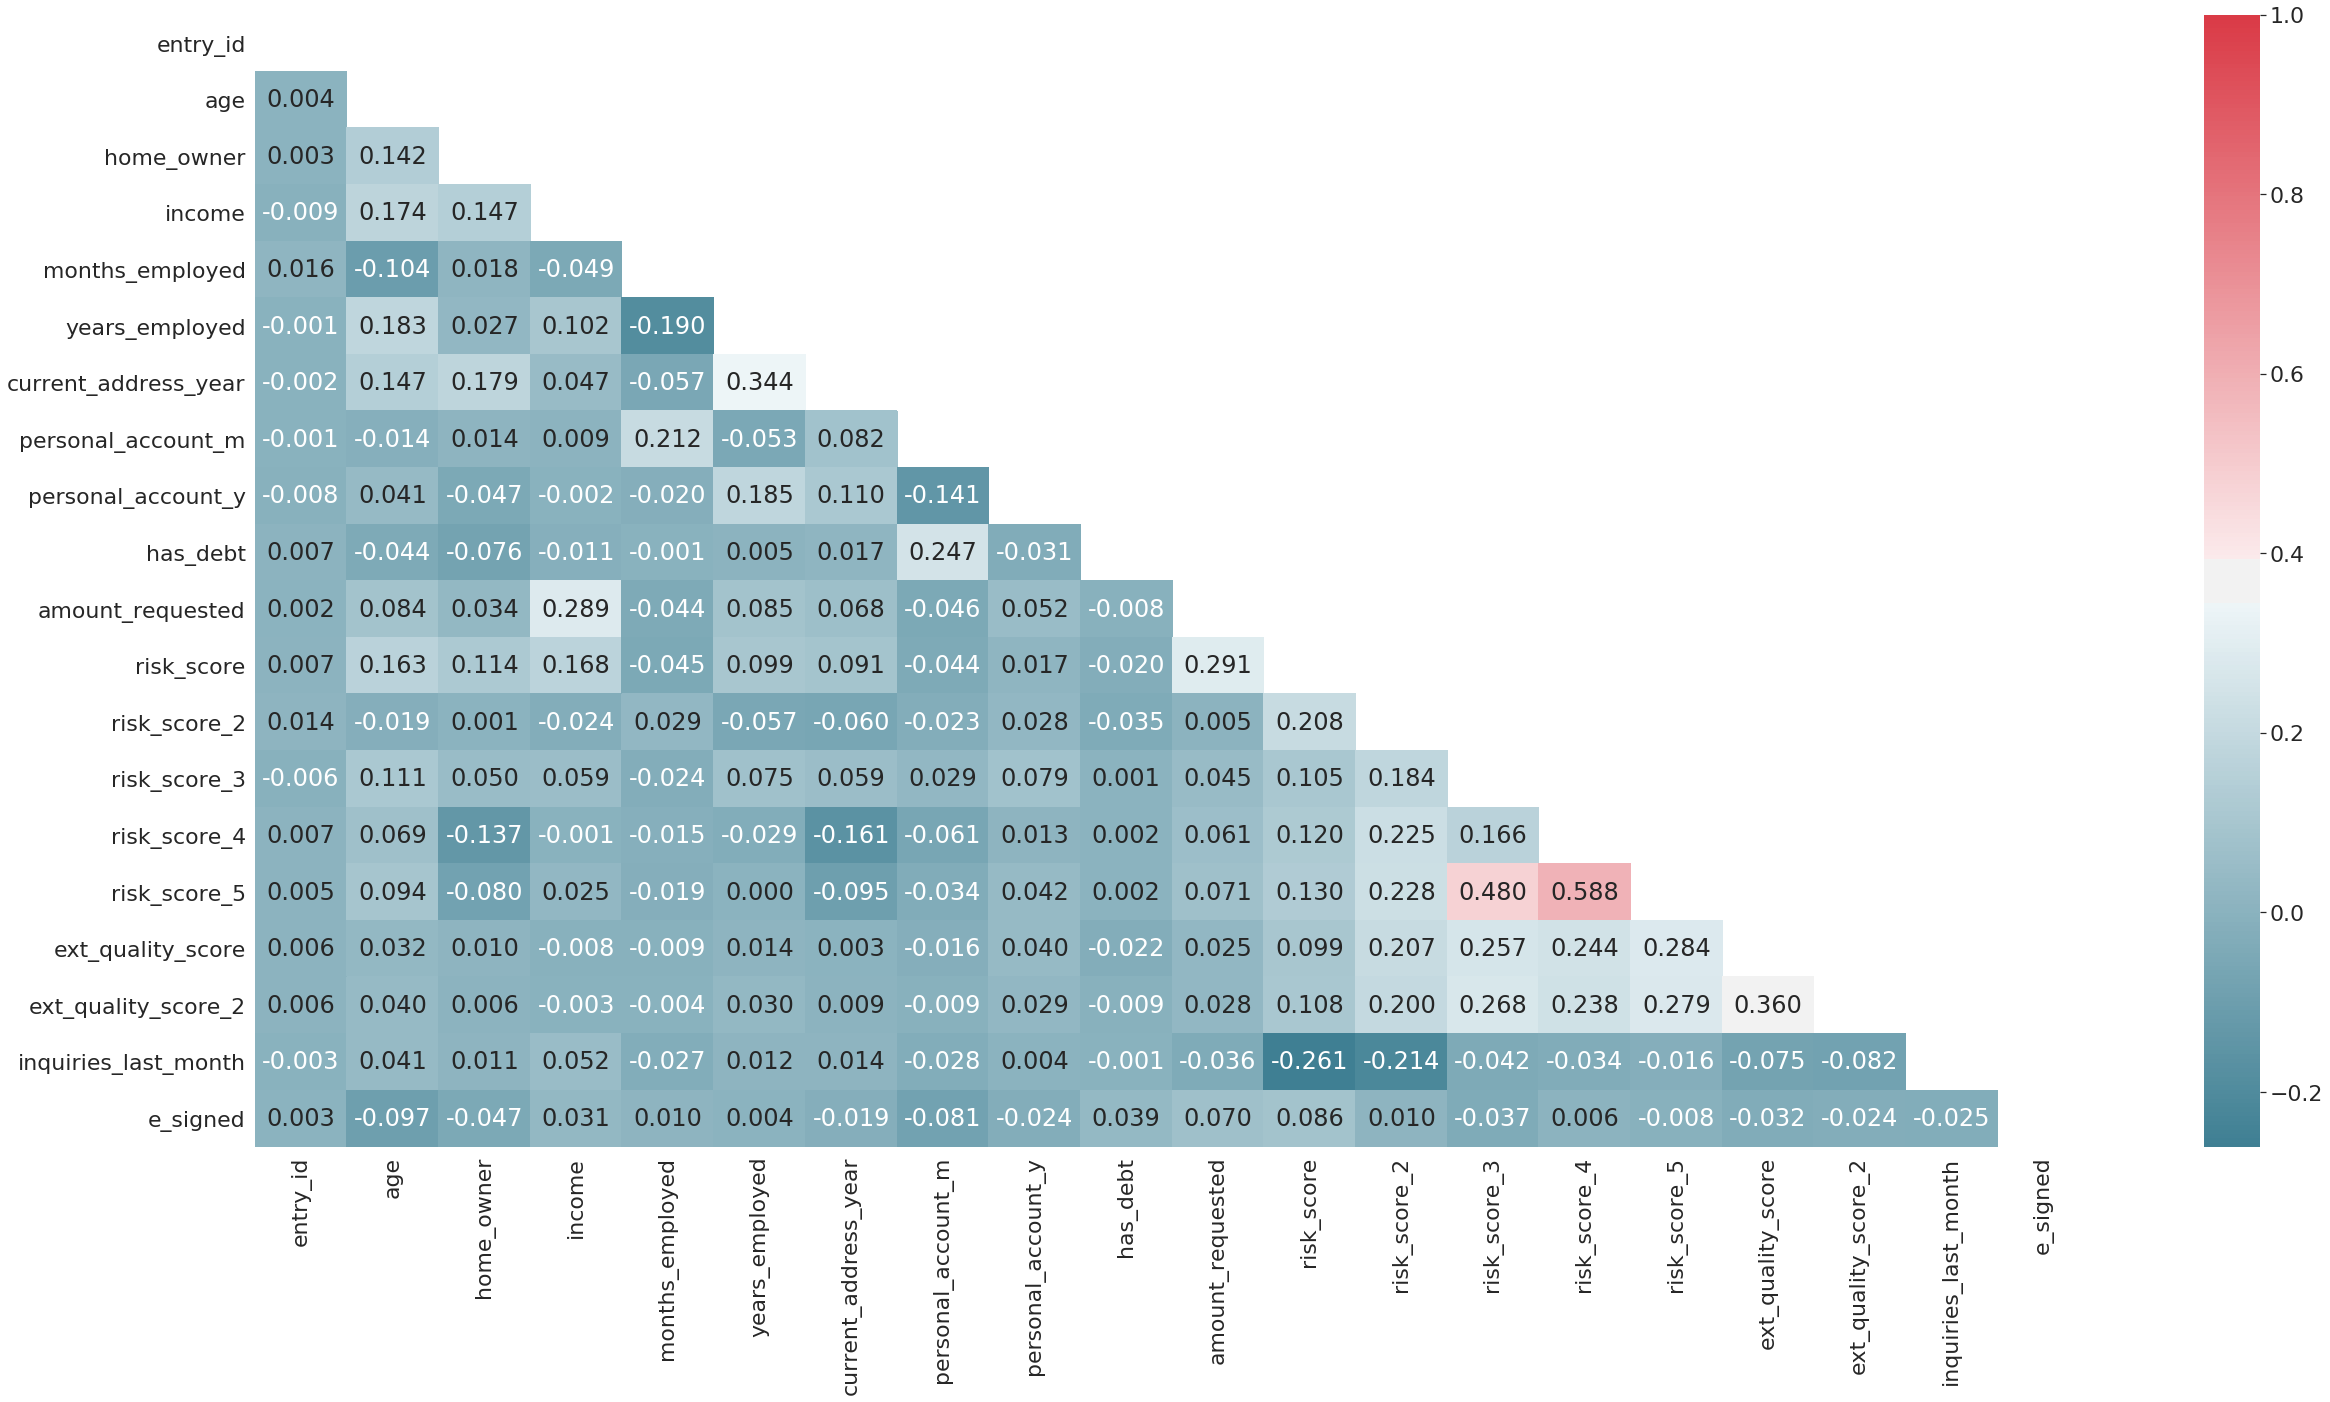

In [6]:
# Correlation
sns.set(style='whitegrid', font_scale=2)
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(36,20))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap,  annot=True, fmt='.3f')
plt.tight_layout()

In [7]:
# Feature engineering
df['personal_account_months'] = df.personal_account_m + (df.personal_account_y * 12)
df.drop(['months_employed', 'personal_account_m', 'personal_account_y'], axis=1, inplace=True)

In [8]:
# One hot encoding
target = df.e_signed
users = df.entry_id
features = pd.get_dummies(df.drop(['e_signed', 'entry_id'], axis=1))
features.drop(['pay_schedule_semi-monthly'], axis=1, inplace=True)

In [9]:
# Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size= 0.2)
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')

X_train shape: (14326, 19)
X_test shape: (3582, 19)


In [10]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test))

In [11]:
# Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver='liblinear', penalty='l1')
lr_clf.fit(X_train, y_train)
lr_preds = lr_clf.predict(X_test)

In [12]:
# Logistic Regression Metrics
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

acc = accuracy_score(y_test, lr_preds)
prec = precision_score(y_test, lr_preds)
rec = recall_score(y_test, lr_preds)
f1 = f1_score(y_test, lr_preds)
cm = confusion_matrix(y_test, lr_preds)
results = pd.DataFrame([['Lasso', acc, prec, rec, f1]],
                      columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
print('Lasso')
print(cm)
print(results)

Lasso
[[ 641 1010]
 [ 572 1359]]
   Model  Accuracy  Precision   Recall  F1 Score
0  Lasso  0.558347    0.57366  0.70378  0.632093


In [13]:
# Linear Support Vector Classifier
from sklearn.svm import SVC

svc_linear_clf = SVC(kernel='linear')
svc_linear_clf.fit(X_train, y_train)
svc_linear_preds = svc_linear_clf.predict(X_test)

In [14]:
# Linear Support Vector Metrics
acc = accuracy_score(y_test, svc_linear_preds)
prec = precision_score(y_test, svc_linear_preds)
rec = recall_score(y_test, svc_linear_preds)
f1 = f1_score(y_test, svc_linear_preds)
cm = confusion_matrix(y_test, svc_linear_preds)

temp_results = pd.DataFrame([['Linear SVC', acc, prec, rec, f1]],
                      columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results = results.append(temp_results)

print('SVC Linear')
print(cm)
print(results)

SVC Linear
[[ 611 1040]
 [ 535 1396]]
        Model  Accuracy  Precision    Recall  F1 Score
0       Lasso  0.558347   0.573660  0.703780  0.632093
0  Linear SVC  0.560302   0.573071  0.722941  0.639341


In [15]:
# RBF SVC https://chrisalbon.com/machine_learning/support_vector_machines/svc_parameters_using_rbf_kernel/
from sklearn.svm import SVC

svc_rbf_clf = SVC(kernel='rbf')
svc_rbf_clf.fit(X_train, y_train)
svc_rbf_preds = svc_rbf_clf.predict(X_test)

In [16]:
# RBF SVC Metrics
acc = accuracy_score(y_test, svc_rbf_preds)
prec = precision_score(y_test, svc_rbf_preds)
rec = recall_score(y_test, svc_rbf_preds)
f1 = f1_score(y_test, svc_rbf_preds)
cm = confusion_matrix(y_test, svc_rbf_preds)

temp_results = pd.DataFrame([['RBF SVC', acc, prec, rec, f1]],
                      columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results = results.append(temp_results)

print('SVC RBF')
print(cm)
print(results)

SVC RBF
[[ 796  855]
 [ 571 1360]]
        Model  Accuracy  Precision    Recall  F1 Score
0       Lasso  0.558347   0.573660  0.703780  0.632093
0  Linear SVC  0.560302   0.573071  0.722941  0.639341
0     RBF SVC  0.601898   0.613995  0.704298  0.656054


In [17]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100, criterion='entropy')
rf_clf.fit(X_train, y_train)
rf_preds = rf_clf.predict(X_test)

In [18]:
# Random Forest Metrics
acc = accuracy_score(y_test, rf_preds)
prec = precision_score(y_test, rf_preds)
rec = recall_score(y_test, rf_preds)
f1 = f1_score(y_test, rf_preds)
cm = confusion_matrix(y_test, rf_preds)

temp_results = pd.DataFrame([['Random Forest', acc, prec, rec, f1]],
                      columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results = results.append(temp_results)

print('Random Forest')
print(cm)
print(results)

Random Forest
[[ 969  682]
 [ 668 1263]]
           Model  Accuracy  Precision    Recall  F1 Score
0          Lasso  0.558347   0.573660  0.703780  0.632093
0     Linear SVC  0.560302   0.573071  0.722941  0.639341
0        RBF SVC  0.601898   0.613995  0.704298  0.656054
0  Random Forest  0.623116   0.649357  0.654065  0.651703


In [19]:
# K-fold Cross Validation for Random Forest
from sklearn.model_selection import cross_val_score

kfold_score = cross_val_score(estimator=rf_clf, X=X_train, y=y_train, cv=10)
print(f'K-fold Random Forest Score: {kfold_score.mean():.2f} (+/-{(kfold_score.std() * 2):.2f})')

K-fold Random Forest Score: 0.63 (+/-0.03)


In [20]:
# Entropy Grid Search Round 1
from sklearn.model_selection import GridSearchCV
from time import time

parameters = {'max_depth': [3, None],
             'max_features': [1, 5, 10],
             'min_samples_split': [2, 5, 10],
             'min_samples_leaf': [1, 5, 10],
             'bootstrap': [True, False],
              'criterion': ['entropy']}

grid_search = GridSearchCV(estimator = rf_clf,
                          param_grid = parameters,
                          scoring = 'accuracy',
                          cv = 10)

start = time()
grid_search = grid_search.fit(X_train, y_train)
end = time()
print('Grid Search Entropy Round 1\n---------------------------')
print(f'Took {(end-start):.2f} seconds')
print(f'Accuracy: {grid_search.best_score_}')
print(f'Best Parameters: {grid_search.best_params_}')

Grid Search Entropy Round 1
---------------------------
Took 5276.36 seconds
Accuracy: 0.6414208968956012
Best Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 5, 'min_samples_leaf': 10, 'min_samples_split': 2}


In [21]:
# Entropy Round 1 Metrics
predictions = grid_search.predict(X_test)
acc = accuracy_score(y_test, predictions)
prec = precision_score(y_test, predictions)
rec = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

temp_results = pd.DataFrame([['GS Entropy 1', acc, prec, rec, f1]],
                            columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results = results.append(temp_results)

In [22]:
# Entropy Grid Search Round 2
parameters = {'max_depth': [None],
             'max_features': [3, 5, 7],
             'min_samples_split': [8, 10, 12],
             'min_samples_leaf': [1, 2, 3],
             'bootstrap': [True],
              'criterion': ['entropy']}

grid_search = GridSearchCV(estimator = rf_clf,
                          param_grid = parameters,
                          scoring = 'accuracy',
                          cv = 10)

start = time()
grid_search = grid_search.fit(X_train, y_train)
end = time()
print('Grid Search Entropy Round 2\n---------------------------')
print(f'Took {(end-start):.2f} seconds')
print(f'Accuracy: {grid_search.best_score_}')
print(f'Best Parameters: {grid_search.best_params_}')

Grid Search Entropy Round 1
---------------------------
Took 1741.39 seconds
Accuracy: 0.6406512785226135
Best Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'max_features': 7, 'min_samples_leaf': 2, 'min_samples_split': 10}


In [23]:
# Entropy Round 2 Metrics
predictions = grid_search.predict(X_test)
acc = accuracy_score(y_test, predictions)
prec = precision_score(y_test, predictions)
rec = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

temp_results = pd.DataFrame([['GS Entropy 2', acc, prec, rec, f1]],
                            columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results = results.append(temp_results)

In [24]:
# Gini 1 Grid Search
parameters = {'max_depth': [3, None],
             'max_features': [1, 5, 10],
             'min_samples_split': [2, 5, 10],
             'min_samples_leaf': [1, 5, 10],
             'bootstrap': [True, False],
              'criterion': ['gini']}

grid_search = GridSearchCV(estimator = rf_clf,
                          param_grid = parameters,
                          scoring = 'accuracy',
                          cv = 10)

start = time()
grid_search = grid_search.fit(X_train, y_train)
end = time()
print('Grid Search Gini Round 1\n---------------------------')
print(f'Took {(end-start):.2f} seconds')
print(f'Accuracy: {grid_search.best_score_}')
print(f'Best Parameters: {grid_search.best_params_}')

Grid Search Gini Round 1
---------------------------
Took 2767.81 seconds
Accuracy: 0.6408608244609308
Best Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'max_features': 5, 'min_samples_leaf': 10, 'min_samples_split': 2}


In [25]:
# Gini 1 Metrics
predictions = grid_search.predict(X_test)
acc = accuracy_score(y_test, predictions)
prec = precision_score(y_test, predictions)
rec = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

temp_results = pd.DataFrame([['GS Gini 1', acc, prec, rec, f1]],
                            columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results = results.append(temp_results)

           Model  Accuracy  Precision    Recall  F1 Score
0          Lasso  0.558347   0.573660  0.703780  0.632093
0     Linear SVC  0.560302   0.573071  0.722941  0.639341
0        RBF SVC  0.601898   0.613995  0.704298  0.656054
0  Random Forest  0.623116   0.649357  0.654065  0.651703
0   GS Entropy 1  0.618649   0.639094  0.672191  0.655225
0   GS Entropy 2  0.611669   0.632223  0.668566  0.649887
0      GS Gini 1  0.622278   0.643069  0.672708  0.657555


In [26]:
# Gini 2 Grid Search
parameters = {'max_depth': [None],
             'max_features': [8, 10, 12],
             'min_samples_split': [2, 3, 4],
             'min_samples_leaf': [8, 10, 12],
             'bootstrap': [True],
              'criterion': ['gini']}

grid_search = GridSearchCV(estimator = rf_clf,
                          param_grid = parameters,
                          scoring = 'accuracy',
                          cv = 10)

start = time()
grid_search = grid_search.fit(X_train, y_train)
end = time()
print('Grid Search Gini Round 2\n---------------------------')
print(f'Took {(end-start):.2f} seconds')
print(f'Accuracy: {grid_search.best_score_}')
print(f'Best Parameters: {grid_search.best_params_}')

Grid Search Gini Round 2
---------------------------
Took 1341.04 seconds
Accuracy: 0.6439330115747329
Best Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'max_features': 10, 'min_samples_leaf': 8, 'min_samples_split': 2}


In [27]:
# Gini 2 Metrics
predictions = grid_search.predict(X_test)
acc = accuracy_score(y_test, predictions)
prec = precision_score(y_test, predictions)
rec = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

temp_results = pd.DataFrame([['GS Gini 2', acc, prec, rec, f1]],
                            columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results = results.append(temp_results)
print(results.reset_index().drop(['index'], axis=1))

           Model  Accuracy  Precision    Recall  F1 Score
0          Lasso  0.558347   0.573660  0.703780  0.632093
1     Linear SVC  0.560302   0.573071  0.722941  0.639341
2        RBF SVC  0.601898   0.613995  0.704298  0.656054
3  Random Forest  0.623116   0.649357  0.654065  0.651703
4   GS Entropy 1  0.618649   0.639094  0.672191  0.655225
5   GS Entropy 2  0.611669   0.632223  0.668566  0.649887
6      GS Gini 1  0.622278   0.643069  0.672708  0.657555
7      GS Gini 2  0.618370   0.641141  0.663387  0.652074


In [28]:
# Final Results
final_results = pd.concat([y_test, users], axis=1).dropna()
final_results['predictions'] = predictions
final_results = final_results[['entry_id', 'e_signed', 'predictions']]
print(final_results)

       entry_id  e_signed  predictions
6       7948313       1.0            1
18      8515555       1.0            0
24      3470965       1.0            1
28      7290744       0.0            1
30      6502470       0.0            1
...         ...       ...          ...
17892   4669977       0.0            1
17896   2641917       0.0            0
17903   9949728       0.0            1
17904   9442442       0.0            0
17906   8708471       1.0            1

[3582 rows x 3 columns]
